In [69]:
import qmcpy as qp
import numpy as np
import matplotlib.pyplot as plt

In [70]:
plt.rcParams.update({'font.size': 14})

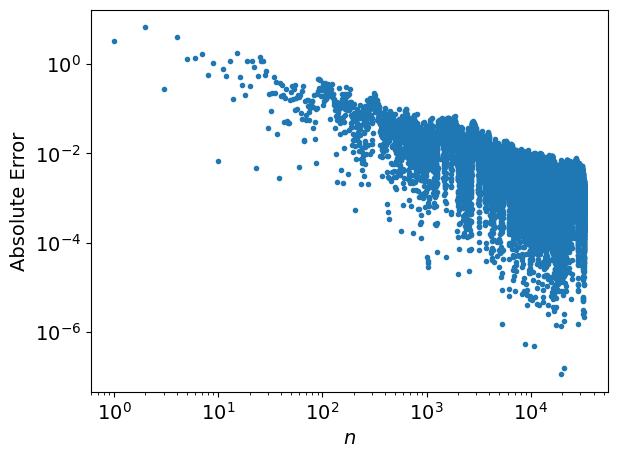

In [93]:
d = 6  #dimension of the problem
n = 2**15   #number of points or sample size

k = qp.Keister(qp.Lattice(d, seed = 47))  #you should randomize and not skip the first point; 
                #if you need reproducibility, then fix the seed
x = k.discrete_distrib.gen_samples(n)
#x = x[1:] # skipping [0,0]
y = k.f(x)

n_vec = np.arange(1, n+1)  #keeping all points
cumsum_y = np.cumsum(y) # compute cumulative sums
sample_means = cumsum_y / n_vec  # compute sample means for each n = 1,...

true_value = k.exact_integ(d)
error = np.abs(true_value - sample_means)

# selecting powers of 2

# is_power_of_2 = np.log2(n_vec) % 1 == 0
# plt.loglog(n_vec[is_power_of_2], error[is_power_of_2], '.', label=r'$n = 2^m$')
# plt.loglog(n_vec[~is_power_of_2], error[~is_power_of_2], '.', color ='r')

plt.loglog(n_vec, error, '.', linestyle='none')
#plt.loglog(n_vec, error[0]/n_vec, label=r'$O(n^{-1})$',color='k')
plt.xlabel('$n$')
#plt.legend()
plt.ylabel('Absolute Error')
plt.tight_layout()
plt.show()

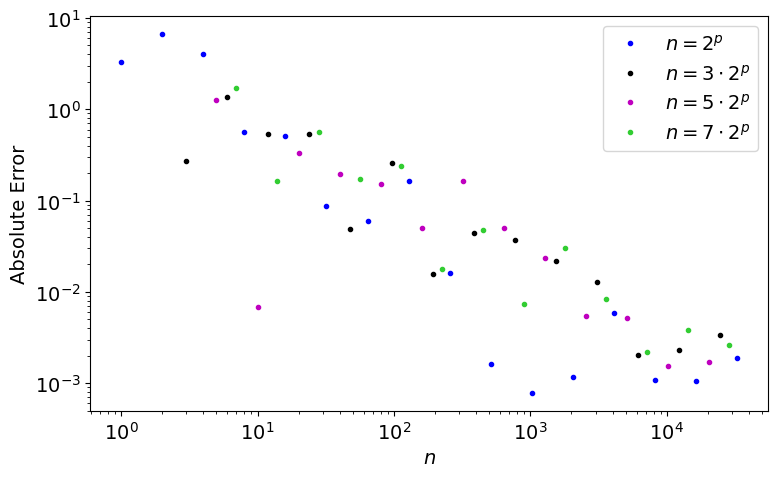

In [101]:
plt.figure(figsize=(8, 5))

#plt.loglog(n_vec, error, '.', color='gray', label='Other $n$')

#n = 2^p

powers_of_two = np.log2(n_vec) % 1 == 0
plt.loglog(n_vec[powers_of_two], error[powers_of_two], '.', label='$n = 2^p$', color='blue')

# n = 3*2^p
lambda_3 = np.log2(n_vec / 3) % 1 == 0
plt.loglog(n_vec[lambda_3], error[lambda_3], '.', label=r'$n = 3 \cdot 2^p$', color='k')

# n = 5*2^p
lambda_5 = np.log2(n_vec / 5) % 1 == 0
plt.loglog(n_vec[lambda_5], error[lambda_5], '.', label=r'$n = 5 \cdot 2^p$', color='m')

# n = 7*2^p
lambda_7 = np.log2(n_vec / 7) % 1 == 0
plt.loglog(n_vec[lambda_7], error[lambda_7], '.', label=r'$n = 7 \cdot 2^p$', color='limegreen')

#plt.loglog(n_vec, error[0]/n_vec, label=r'$O(n^{-1})$',color='k')

plt.xlabel('$n$')
plt.ylabel('Absolute Error')
plt.tight_layout()
plt.legend()
plt.show()

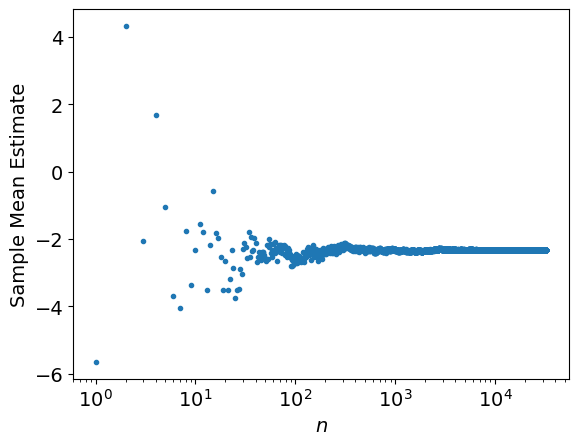

In [24]:
plt.semilogx(n_vec, sample_means, '.', linestyle='none')
plt.xlabel("$n$")
plt.ylabel("Sample Mean Estimate")
plt.show()

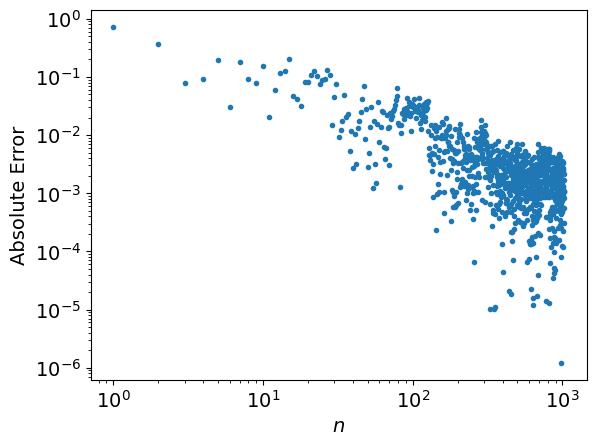

In [21]:
k = qp.Keister(qp.Lattice(2, seed=7))
x = k.discrete_distrib.gen_samples(n)
y = k.f(x)

cumsum_y = np.cumsum(y)
n_vec = np.arange(1, n + 1)  
sample_means = cumsum_y / n_vec # Compute sample means for each n = 1 to 2^10 


true_value = k.exact_integ(d)
error = np.abs(true_value - sample_means)

plt.loglog(n_vec, error, '.', linestyle='none')
#plt.loglog(n_vec, 1/n_vec, label=r'$O(n^{-1})$',color='k')
plt.xlabel('$n$')
#plt.legend()
plt.ylabel('Absolute Error')
plt.show()

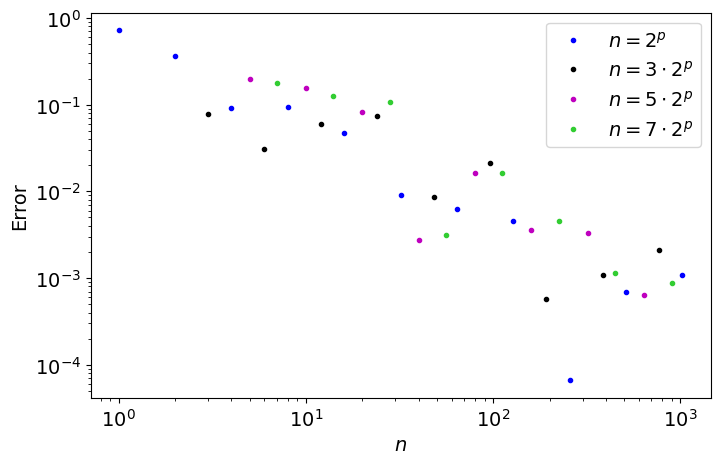

In [22]:
plt.figure(figsize=(8, 5))

#plt.loglog(n_vec, error, '.', color='gray', label='Other $n$')

powers_of_two = (n_vec & (n_vec - 1) == 0)
plt.loglog(n_vec[powers_of_two], error[powers_of_two], '.', label='$n = 2^p$', color='blue')

# n = 3*2^p
lambda_3 = np.log2(n_vec / 3) % 1 == 0
plt.loglog(n_vec[lambda_3], error[lambda_3], '.', label=r'$n = 3 \cdot 2^p$', color='k')

# n = 5*2^p
lambda_5 = np.log2(n_vec / 5) % 1 == 0
plt.loglog(n_vec[lambda_5], error[lambda_5], '.', label=r'$n = 5 \cdot 2^p$', color='m')

# n = 7*2^p
lambda_7 = np.log2(n_vec / 7) % 1 == 0
plt.loglog(n_vec[lambda_7], error[lambda_7], '.', label=r'$n = 7 \cdot 2^p$', color='limegreen')

plt.xlabel('$n$')
plt.ylabel('Error')
plt.legend()
plt.show()

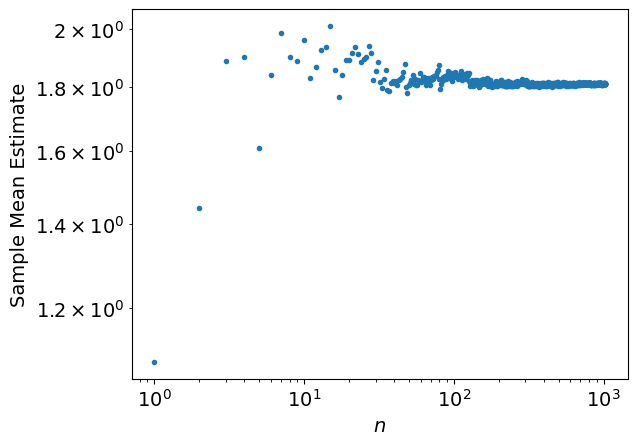

In [23]:
plt.loglog(n_vec, sample_means, '.', linestyle='none')
plt.xlabel("$n$")
plt.ylabel("Sample Mean Estimate")
plt.show()